# Crime Analytics: Visualization of Incident Reports
## Overview

In this notebook, I analyze criminal incident data from Seattle or San Francisco to visualize patterns and contrast and compare patterns across the two cities.

I produce a blog-post-style visual narrative consisting of a series of visualizations interspersed with sufficient descriptive text to make a convincing argument.

## Project Ideas

- For either city, how do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?
- For either city, how do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?
- For either city, how do incidents vary month to month in the Summer 2014 dataset?
- For either city, which incident types tend to correlate with each other on a day-by-day basis?
- **Advanced**  What can we infer broadly about the differences in crime patterns between Seattle and San Francisco? Does one city tend to have more crime than the other, per capita? Do the relative frequencies of types of incidents change materially between the two cities? (NOTE: The two datasets do not have the same schema, so comparisons will require some work and some assumptions.)
- **Advanced**  For either city, do certain crimes correlate with environmental factors such as temperature? (To answer this kind of question, I use external data sources )

## Data

This project uses the real crime data from Summer 2014 one or both of two US cities: Seattle and/or San Francisco.

**Seattle Data**

[**Seattle Summer 2014 dataset used for code development**](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/seattle_incidents_summer_2014.csv)

_Other Seattle data:_

[_Seattle Data Portal_](https://data.seattle.gov/)

[_Full Seattle incident dataset_](https://data.seattle.gov/Public-Safety/Seattle-Police-Department-Police-Report-Incident/7ais-f98f)

**San Francisco Data**

[**San Francisco Summer 2014 dataset used for code development**](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/sanfrancisco_incidents_summer_2014.csv)

_Other San Francisco Data:_

[_San Francisco Data Portal_](https://data.sfgov.org/)

[_Full San Francisco incident dataset_](https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry)

All datasets are provided through their respective cities data portals, all powered by  [Socrata](https://www.socrata.com/). The three portals and the links to the original datasets are

**Integration**  
Inter-city comparisons of crime data 
* These datasets do NOT agree on schema, and they do NOT agree on categories or descriptions for specific crimes. 
* To draw comparisons and contrasts across cities, I need to make some assumptions about correspondences. For example, LARCENY/THEFT is a category in San Francisco, but Seattle uses codes of the form THEFT-CARPROWL or THEFT-BUILDING.
* Need to make some reasonable assumptions to compare these data, and explain and justify these assumptions.

**Scale**  
* The full Chicago dataset covering 2001 to present has 5M records and is about 1.3GB as a csv file
* Develop and test with subsets of all three datasets during the period Summer 2014 
* Expand analysis to the full datasets

### Tools
Python with  [Bokeh](http://bokeh.pydata.org/en/latest/) and  [matplotlib](http://matplotlib.org/)

### Import packages and tools

In [64]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import bokeh
%matplotlib inline

# Bokeh tools to build some pretty plots
from bokeh.embed import components, notebook_div, autoload_static
from bokeh.plotting import figure, gridplot, output_file, show, save
from bokeh.io import output_notebook, output_file, show
from bokeh.resources import INLINE, CDN
from bokeh.util.string import encode_utf8
from bokeh.models.widgets import CheckboxButtonGroup, CheckboxGroup, RadioButtonGroup, RangeSlider, RadioGroup
from bokeh.models import CustomJS, Legend, ColumnDataSource, HoverTool, Range1d, LinearColorMapper, LogColorMapper 
from bokeh.models import DatetimeTickFormatter, LabelSet, Title
from bokeh.charts import Bar, output_file, show
from bokeh.layouts import row, column,gridplot

# Initialize plot configuration
output_notebook()

Loading BokehJS ...

### Load data
Will focus on the SF summer 2014 data first and expand to the Seattle data later.  

In [2]:
sf_summer      = pd.read_csv("sanfrancisco_incidents_summer_2014.csv", low_memory=False)

#### Look at sample data

In [3]:
sf_summer = sf_summer.drop(['IncidntNum','PdId'], axis=1)
sf_summer.columns = ['Category', 'Description', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'Longitude', 'Latitude', 'Location']
sf_summer.head(2)

,Category,Description,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Longitude,Latitude,Location
0,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)"
1,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)"


### Exploratory data analysis:
Look at distribution of crime categories/ offense type

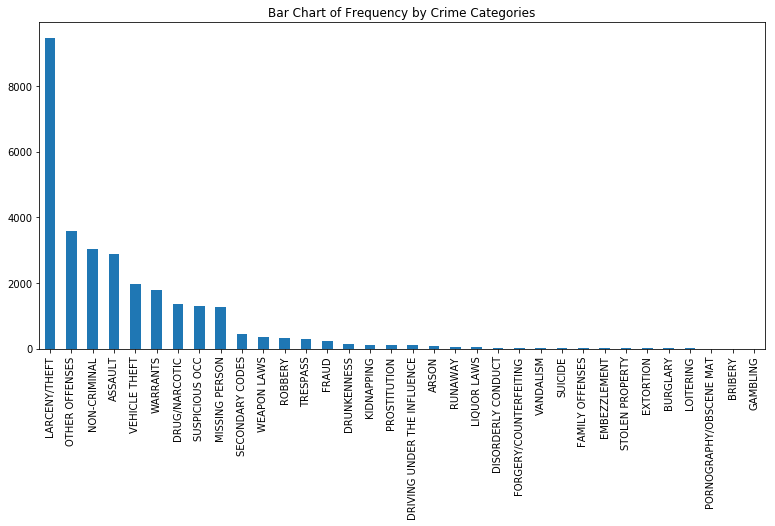

In [116]:
plt.figure(figsize= (13,6))
sf_summer['Category'].value_counts().plot(kind="bar")
plt.title("Bar Chart of Frequency by Crime Categories")

In [127]:
#from bokeh.charts import Bar, output_file, show
#Tools = "pan,xwheel_zoom,box_zoom,box_select, hover, reset,save"
#df = pd.DataFrame(Category_by_hour['Total'] )
#p0 = Bar(df, values='Total', title="Frequency of the top 10 categories", color="wheat", legend=False, height= 500, width = 800, tools= Tools)
#show(p0)

### Question: 
- For either city, how do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?

In [5]:
# Creaete a column for hour of the day
sf_summer['Hour'] = sf_summer['Time'].apply(lambda x: int(x[:2]) )

### Frequency table of incidents by hour of the day

In [6]:
Category_by_hour = sf_summer.groupby(['Category', 'Hour']).size().unstack()
# Replace NaN by 0
Category_by_hour = Category_by_hour.replace(np.NaN, 0. )
Category_by_hour['Total'] = sf_summer.groupby('Category').size()
Category_by_hour.sort_values(by= 'Total', inplace= True, ascending= False)

Category_by_hour.head(12)

Hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Total
Category,,,,,,,,,,,,,,,,,,,,,
LARCENY/THEFT,354.0,230.0,143.0,88.0,65.0,66.0,91.0,153.0,235.0,293.0,...,513.0,544.0,654.0,818.0,719.0,681.0,593.0,562.0,462.0,9466
OTHER OFFENSES,262.0,106.0,89.0,54.0,23.0,45.0,59.0,81.0,135.0,134.0,...,212.0,189.0,263.0,207.0,183.0,150.0,146.0,165.0,178.0,3567
NON-CRIMINAL,144.0,72.0,59.0,36.0,21.0,28.0,42.0,75.0,135.0,139.0,...,180.0,217.0,192.0,151.0,149.0,122.0,134.0,115.0,107.0,3023
ASSAULT,169.0,115.0,126.0,68.0,39.0,52.0,47.0,70.0,90.0,103.0,...,135.0,155.0,182.0,138.0,130.0,164.0,153.0,178.0,146.0,2882
VEHICLE THEFT,66.0,51.0,36.0,24.0,19.0,19.0,33.0,33.0,71.0,66.0,...,85.0,100.0,136.0,177.0,144.0,172.0,130.0,161.0,137.0,1966
WARRANTS,62.0,49.0,36.0,23.0,17.0,21.0,32.0,49.0,56.0,75.0,...,106.0,105.0,143.0,139.0,100.0,91.0,66.0,74.0,73.0,1782
DRUG/NARCOTIC,56.0,30.0,31.0,24.0,3.0,8.0,9.0,25.0,27.0,62.0,...,99.0,105.0,117.0,97.0,62.0,85.0,26.0,51.0,58.0,1345
SUSPICIOUS OCC,74.0,32.0,26.0,17.0,13.0,11.0,17.0,31.0,41.0,65.0,...,77.0,90.0,73.0,69.0,81.0,62.0,60.0,54.0,46.0,1300
MISSING PERSON,39.0,23.0,14.0,5.0,10.0,11.0,13.0,43.0,76.0,62.0,...,79.0,87.0,53.0,52.0,48.0,41.0,57.0,52.0,36.0,1266


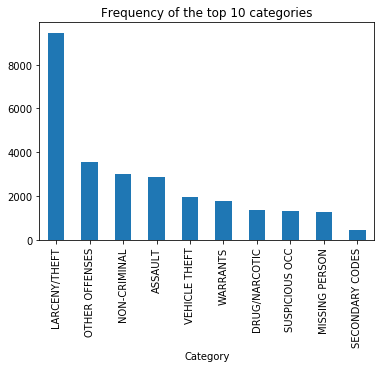

In [7]:
Category_by_hour['Total'].head(10).plot(kind="bar")
plt.title('Frequency of the top 10 categories')

We can do line plot using matplotlib:
```python 
plt.figure(figsize= (15,8))
for cat in list(Category_by_hour.index)[:10] :
    Category_by_hour.drop('Total', axis=1).loc[cat].plot(label= cat)
plt.xticks(range(24))
plt.legend()
plt.title('Crime Incident Frequency by hour of the day')
```
### Interactive visualization using Bokeh is nicer:

* Click wheel zoom tool on the left and zoom the x axis
* Move mouse onto any data point to see values

In [81]:
# transpose the data so columns are crimes and rows are hours of the day
df = Category_by_hour.transpose().drop('Total', axis= 0)
df = df.reset_index()

source = ColumnDataSource( df )
output_notebook(resources=INLINE)

Loading BokehJS ...

In [93]:
from bokeh.palettes import Category20

Tools = "pan,xwheel_zoom,box_zoom,box_select, hover, reset,save"

p1 = figure( title= 'Top 10 Crime Incidence by hour of the day', height= 500, width= 850, tools= Tools, 
            x_axis_label = 'Hour of the Day', y_axis_label = 'Crime Frequency')
p1.grid.grid_line_alpha=0.3

numlines = 12 
mypalette = Category20[numlines]

i=0
for cat in list(Category_by_hour.index)[:numlines ] :
    category = cat+' '
    p1.line(x= 'Hour' , y = cat, source= source ,  legend= category  , color = mypalette[i]  )
    i +=1
p1.legend.location = "top_left"

p1.ygrid.band_fill_color = "olive"
p1.ygrid.band_fill_alpha = 0.05


show(p1)

### - For San Francisco in summer 2014, how do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?
### Answer: 
  - The frequency of incidents are lowest from mid-night to early morning (1AM - 7AM) and peaks during the afternoon and evening hours (2PM - 12AM) from the line plot above
  - LARCENY/THEFT was the most common crime in the evening from the line plot above
  - Robberies is the most common during at noon (12PM) and near mid-night(10PM-2AM)

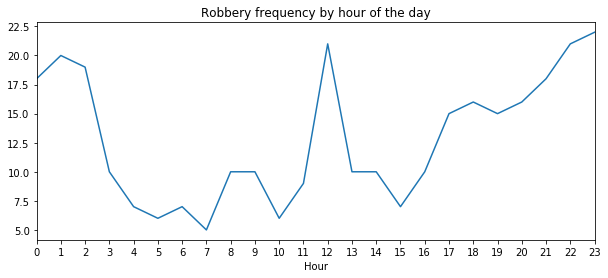

In [124]:
Category_by_hour.drop('Total', axis=1).loc['ROBBERY'].plot(figsize= (10,4))
plt.xticks(range(24))
plt.title('Robbery frequency by hour of the day')

## Question2 :
### - For either city, how do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?

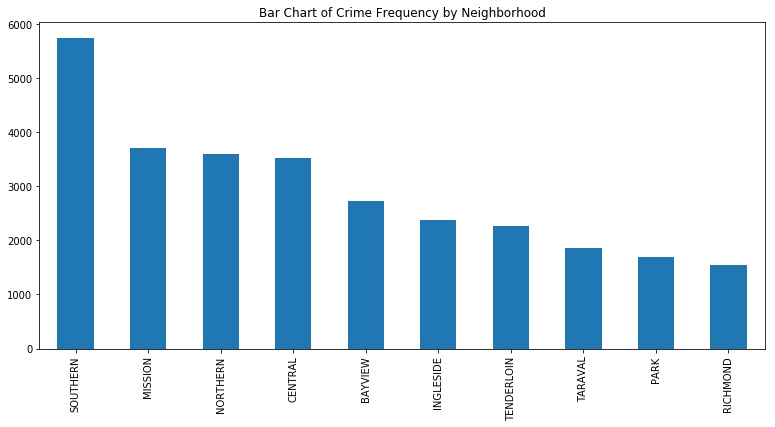

In [137]:
plt.figure(figsize= (13,6))
sf_summer['PdDistrict'].value_counts().plot(kind="bar")
plt.title("Bar Chart of Crime Frequency by Neighborhood")

In [140]:
Category_by_neighbor = sf_summer.groupby(['Category', 'PdDistrict']).size().unstack()
# Replace NaN by 0
Category_by_neighbor = Category_by_neighbor.replace(np.NaN, 0. )
Category_by_neighbor['Total'] = sf_summer.groupby('Category').size()
Category_by_neighbor.sort_values(by= 'Total', inplace= True, ascending= False)

Category_by_neighbor

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Total
Category,,,,,,,,,,,
LARCENY/THEFT,481.0,1574.0,548.0,671.0,1499.0,576.0,527.0,2562.0,547.0,481.0,9466
OTHER OFFENSES,435.0,326.0,351.0,502.0,394.0,197.0,234.0,543.0,269.0,316.0,3567
NON-CRIMINAL,203.0,431.0,189.0,345.0,347.0,193.0,250.0,639.0,210.0,216.0,3023
ASSAULT,359.0,277.0,292.0,459.0,297.0,118.0,81.0,528.0,147.0,324.0,2882
VEHICLE THEFT,245.0,146.0,382.0,306.0,202.0,150.0,118.0,161.0,222.0,34.0,1966
WARRANTS,249.0,162.0,110.0,281.0,193.0,109.0,45.0,331.0,65.0,237.0,1782
DRUG/NARCOTIC,111.0,91.0,81.0,217.0,174.0,63.0,51.0,242.0,31.0,284.0,1345
SUSPICIOUS OCC,171.0,131.0,93.0,165.0,149.0,60.0,89.0,213.0,104.0,125.0,1300
MISSING PERSON,141.0,86.0,131.0,297.0,101.0,141.0,50.0,159.0,107.0,53.0,1266


We can visualize the incident frequency by category and neighborhood using a heat map: 

/Users/qiaolinchen/.pyenv/versions/3.5.3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


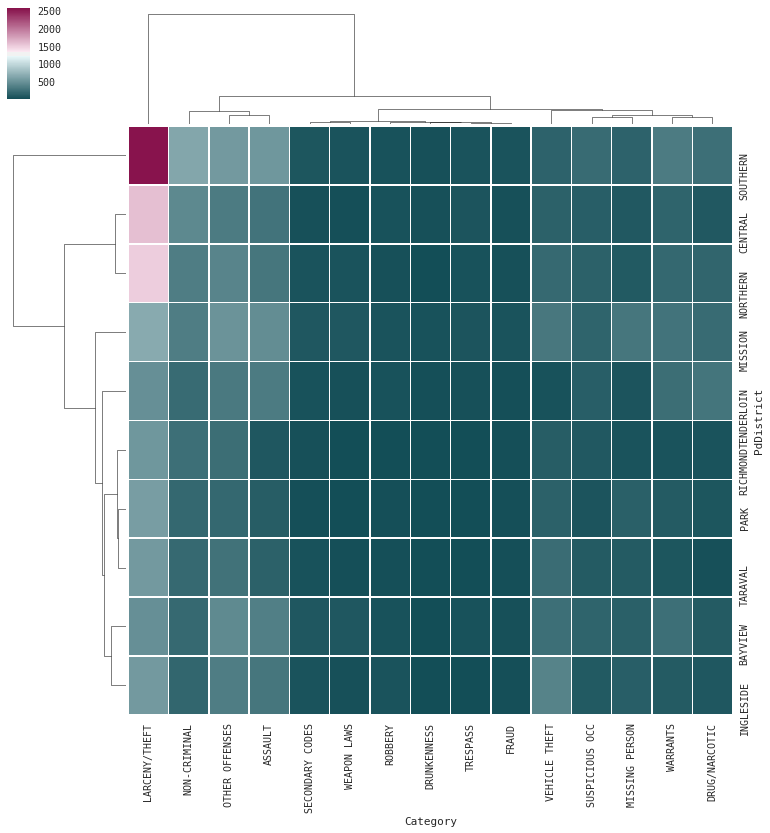

In [148]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font="monospace")

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

# Draw the full plot
sns.clustermap(Category_by_neighbor.drop('Total', axis=1).head(15).transpose()
               ,  linewidths=.5,  figsize=(13, 13), cmap=cmap)

### Question: 
- For SF in summer 2014, how do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?

Answer:
From the above heat map, we can see that:
1. Incidents vary a lot by neighborhood. 
2. Larceny/theft, non-criminal and ohter offenses are are most common in the city center.
3. In southern, central and northern are robberies or thefts most common

### Question:
- For either city, how do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?
- For either city, how do incidents vary month to month in the Summer 2014 dataset?
- For either city, which incident types tend to correlate with each other on a day-by-day basis?
- **Advanced**  What can we infer broadly about the differences in crime patterns between Seattle and San Francisco? Does one city tend to have more crime than the other, per capita? Do the relative frequencies of types of incidents change materially between the two cities? (NOTE: The two datasets do not have the same schema, so comparisons will require some work and some assumptions.)
- **Advanced**  For either city, do certain crimes correlate with environmental factors such as temperature? (To answer this kind of question, I use external data sources )



## Analysis of Seattle Crime Incidents

In [3]:
seattle_summer = pd.read_csv("seattle_incidents_summer_2014.csv",low_memory=False) 

In [4]:
seattle_summer = seattle_summer.drop(['RMS CDW ID', 'General Offense Number', 'Offense Code',
                                      'Offense Code Extension', 'Summary Offense Code'], axis= 1)
seattle_summer.columns = ['Offense Description', 'Description','Date Reported',
       'Date_Start', 'Date_End',
       'Address', 'District/Sector', 'Zone/Beat',
       'Census Tract 2000', 'Longitude', 'Latitude', 'Location', 'Month',
       'Year']

seattle_summer['Category'] = seattle_summer['Offense Description'].apply(lambda x: x.split('-')[0] )

def get_sub_category(x):
    cat = x.split('-')
    if len(cat) ==1: return x.split('-')[0]
    else: return x.split('-')[1]
    
seattle_summer['Sub-category'] = seattle_summer['Offense Description'].apply(get_sub_category)

In [5]:
seattle_summer.head(2)

,Offense Description,Description,Date Reported,Date_Start,Date_End,Address,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,Category,Sub-category
0,BURGLARY-FORCE-RES,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014,BURGLARY,FORCE
1,FRAUD-IDENTITY THEFT,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014,FRAUD,IDENTITY THEFT


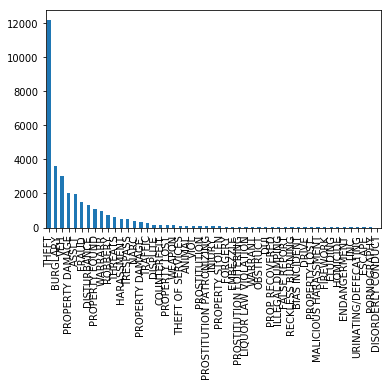

In [6]:
seattle_summer['Category'].value_counts().plot(kind="bar")